In [ ]:
# Required Libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt



In [ ]:
# Step 1: Load the dataset
df = pd.read_csv('synthetic_sensor_data_with_anomalies.csv')



In [ ]:
# Step 2: Add lag features (previous CO2 values)
df['CO2_Lag_1'] = df['CO2'].shift(1)
df['CO2_Lag_2'] = df['CO2'].shift(2)
df['CO2_Lag_3'] = df['CO2'].shift(3)



In [ ]:
# Drop rows with NaN values (due to shifting)
df.dropna(inplace=True)



In [ ]:
# Step 3: Prepare the features (X) and target (y)
X = df[['CO2_Lag_1', 'CO2_Lag_2', 'CO2_Lag_3']]  # Past CO2 values as features
y = df['CO2']  # CO2 values to predict



In [ ]:
# Step 4: Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Step 5: Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)



In [ ]:
# Step 6: Train the model on the training data
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [ ]:
# Step 7: Predict CO2 values on the test data
y_pred = rf_model.predict(X_test)



In [ ]:
# Step 8: Evaluate the model - Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) of the Random Forest Regressor: {mae}")



Mean Absolute Error (MAE) of the Random Forest Regressor: 19.323622853235946


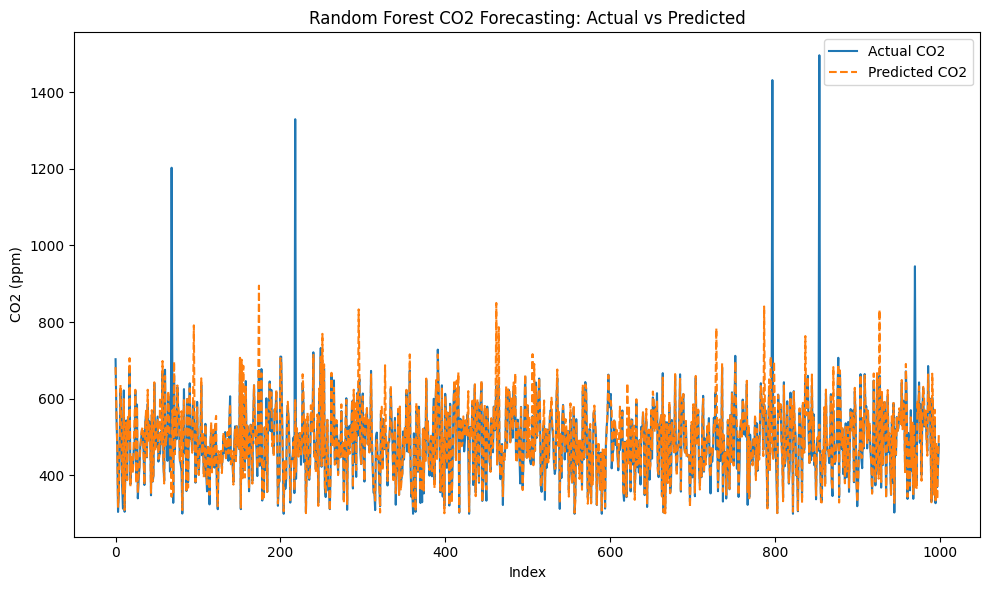

In [ ]:
# Step 9: Visualize the predictions vs actual CO2 values
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual CO2')
plt.plot(y_pred, label='Predicted CO2', linestyle='--')
plt.title('Random Forest CO2 Forecasting: Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Optionally, save the trained Random Forest model
import joblib
joblib.dump(rf_model, 'random_forest_co2_model.pkl')
print("Random Forest model saved!")


Random Forest model saved!
